In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [2]:
df = pd.read_csv("./assignment-datasets/us_retail_sales.csv")

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [4]:
# Use melt to convert from wide to long format
df2=pd.melt(df, id_vars='YEAR', var_name='Month', value_name='#Sales')

In [5]:
## Create date string column for conversion
df2['date_str'] = df2.apply(lambda row: str(row.YEAR) + "-" + str(row.Month) + "-01", axis=1)

## Convert date_string to date_time
df2['datetime'] = df2['date_str'].apply(lambda x: pd.to_datetime(x, format='%Y-%b-%d'))

## Drop unnecessary columns
df2 = df2[['datetime', '#Sales']].sort_values(by='datetime').reset_index(drop=True)

# Drop NA
df2.dropna(inplace=True)

In [6]:
df2.head()

,datetime,#Sales
0,1992-01-01,146925.0
1,1992-02-01,147223.0
2,1992-03-01,146805.0
3,1992-04-01,148032.0
4,1992-05-01,149010.0


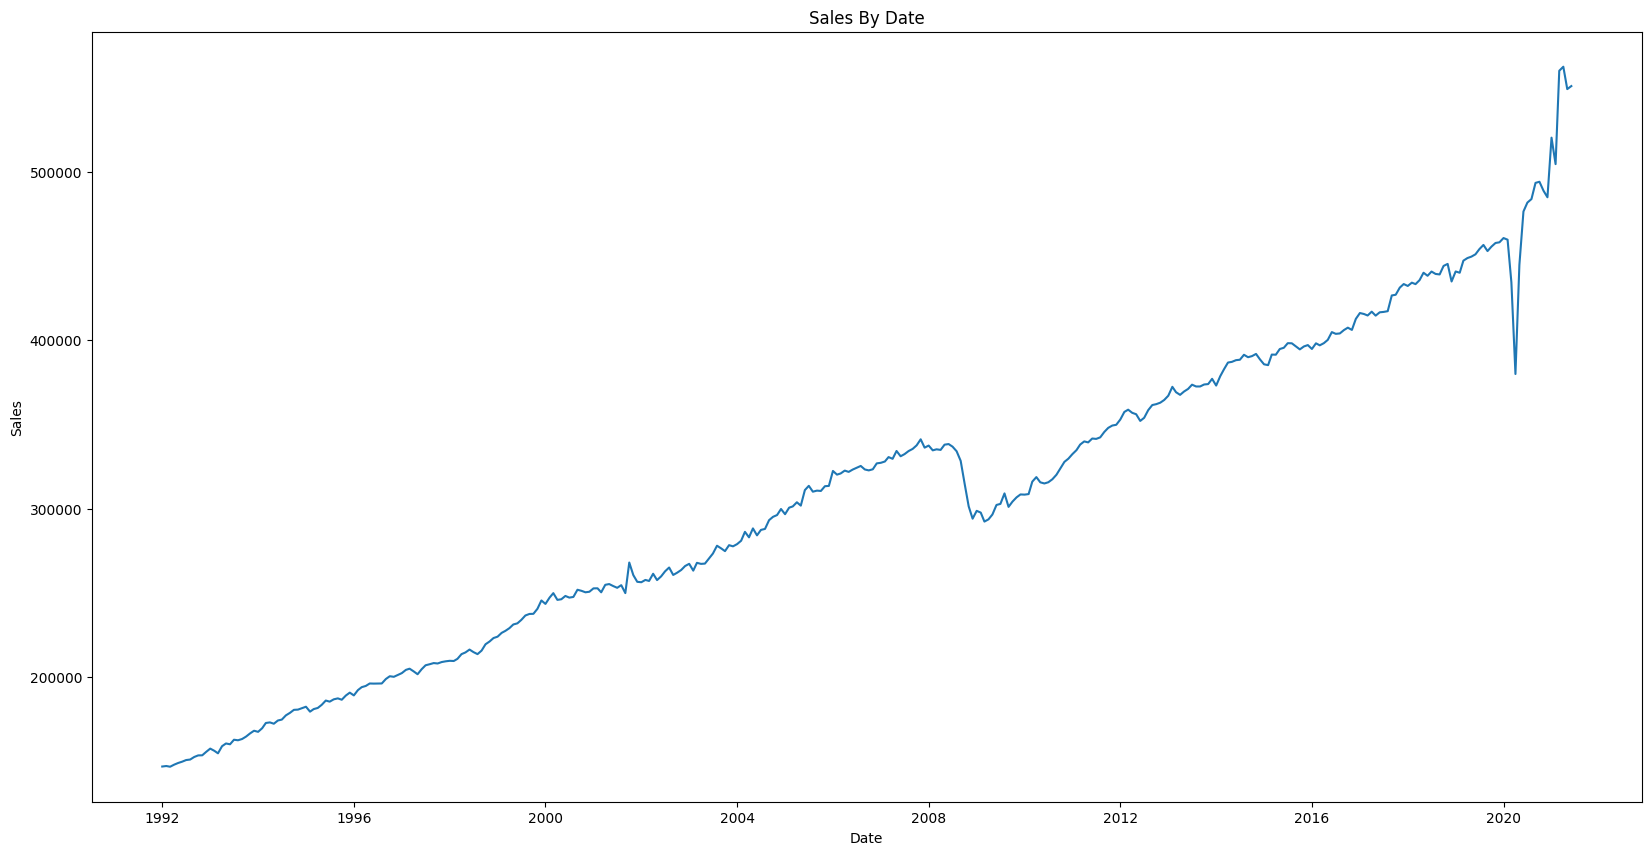

In [7]:
## Show sales over time
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df2['datetime'], df2['#Sales'])
plt.title('Sales By Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

US Retail sales have been steadily increasing since 1992. As you can see in the chart, small decreases in retail sales were seen during the 2008-2009 and at the beggining of 2020.

In [8]:
## Split out training data
train_df = df2[df2['datetime'] < '2020-07-01']

X_train = train_df['datetime']
Y_train = train_df['#Sales']

In [9]:
## Split out test data
test_df = df2[df2['datetime'] >= '2020-07-01']

x_test = test_df['datetime']
y_test = test_df['#Sales']

C:\Users\gyanr\AppData\Local\Temp\ipykernel_44276\3665586636.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['estimate'] = predictions


RMSE: 73875.521


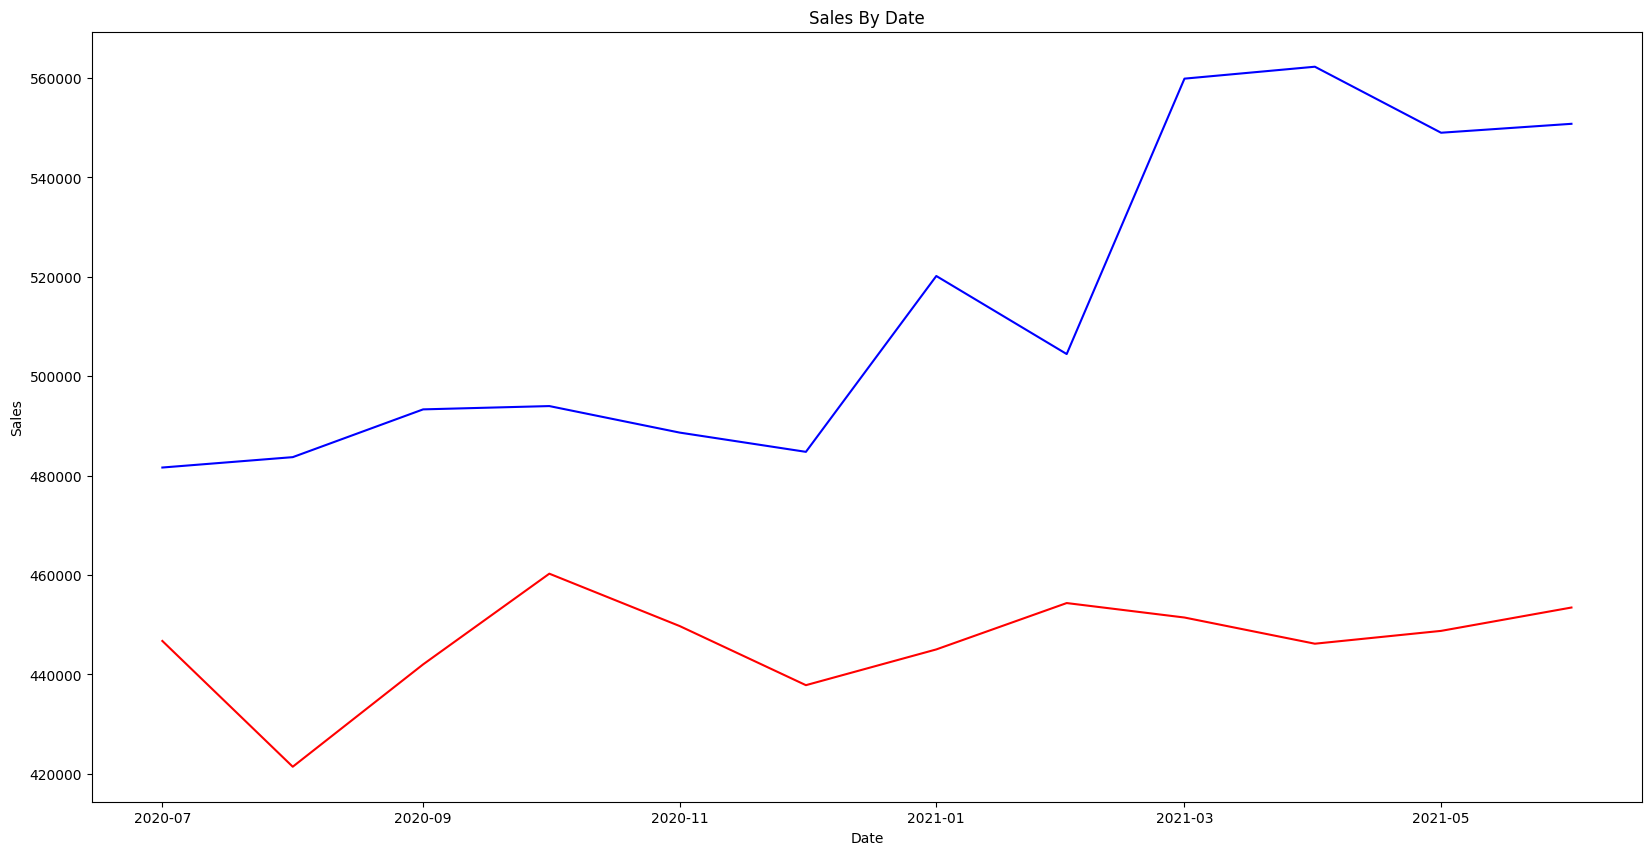

In [10]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

model = AutoReg(Y_train, lags=5)
model_fit = model.fit()

predictions = model_fit.predict(start=len(Y_train), end=(len(Y_train) + len(y_test)) - 1, dynamic=False)

test_df['estimate'] = predictions

rmse = sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %.3f' % rmse)

## Show sales over time
plt.plot(test_df['datetime'], test_df['#Sales'], label='Actual', c='blue')
plt.plot(test_df['datetime'], test_df['estimate'], label='Estimate', c='red')
plt.title('Sales By Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

RMSE value is too high so lets try other models.

RMSE: 52206.764


C:\Users\gyanr\AppData\Local\Temp\ipykernel_44276\1502797846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['estimate'] = predictions


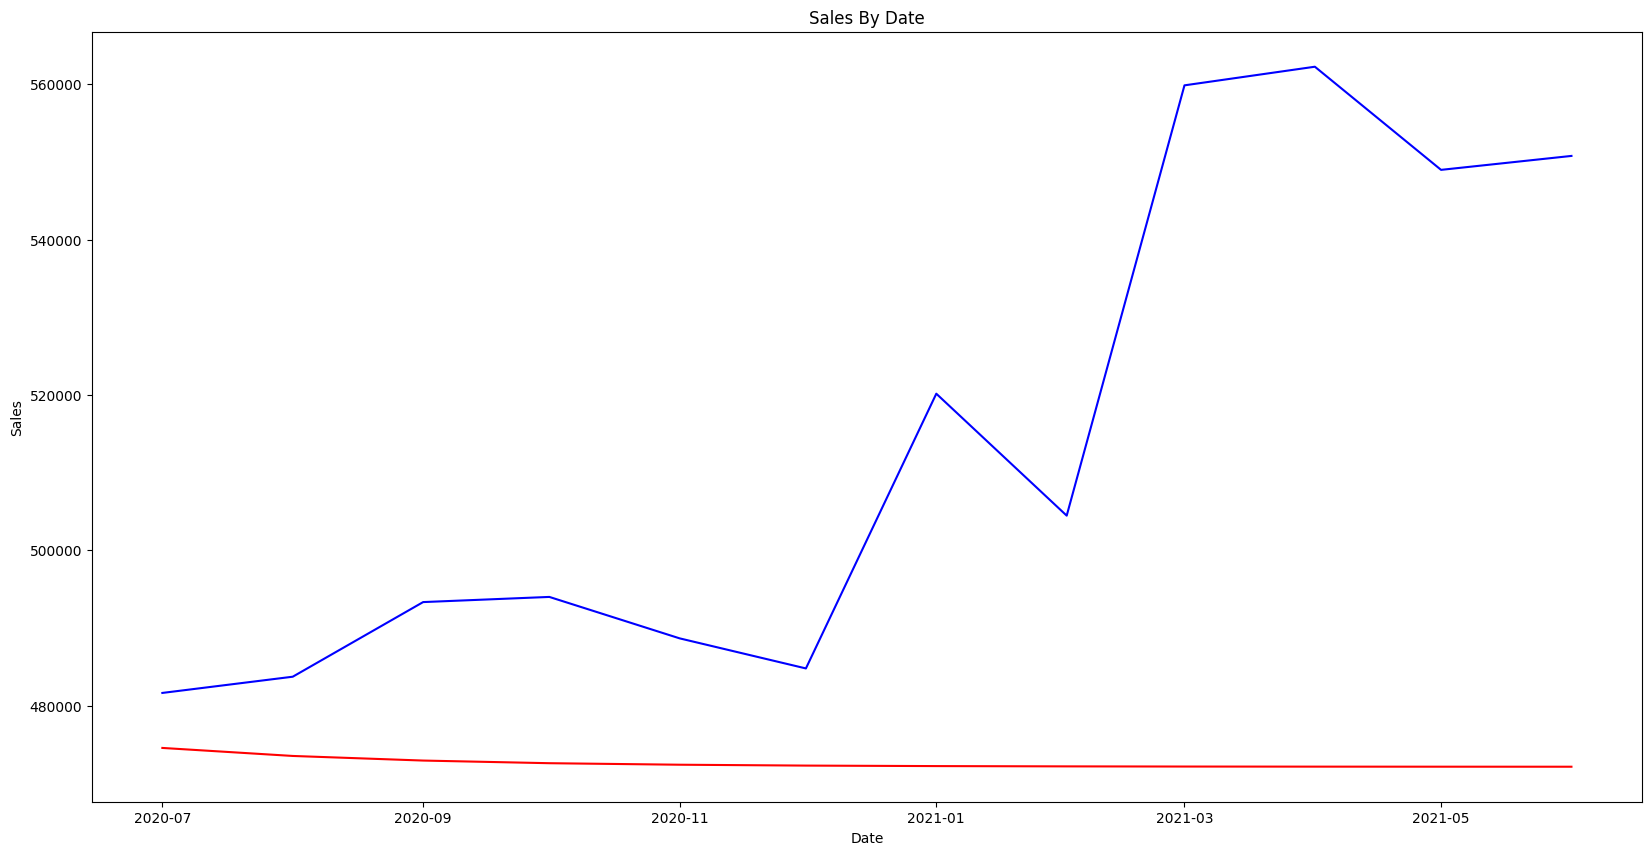

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(Y_train, order=(1, 1, 1))
model_fit = model.fit()

predictions = model_fit.predict(start=len(Y_train), end=(len(Y_train) + len(y_test)) - 1, dynamic=False)

test_df['estimate'] = predictions

rmse = sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %.3f' % rmse)

## Show sales over time
plt.plot(test_df['datetime'], test_df['#Sales'], label='Actual', c='blue')
plt.plot(test_df['datetime'], test_df['estimate'], label='Estimate', c='red')
plt.title('Sales By Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

RMSE: 52206.764


C:\Users\gyanr\AppData\Local\Temp\ipykernel_44276\3146391327.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['estimate'] = predictions


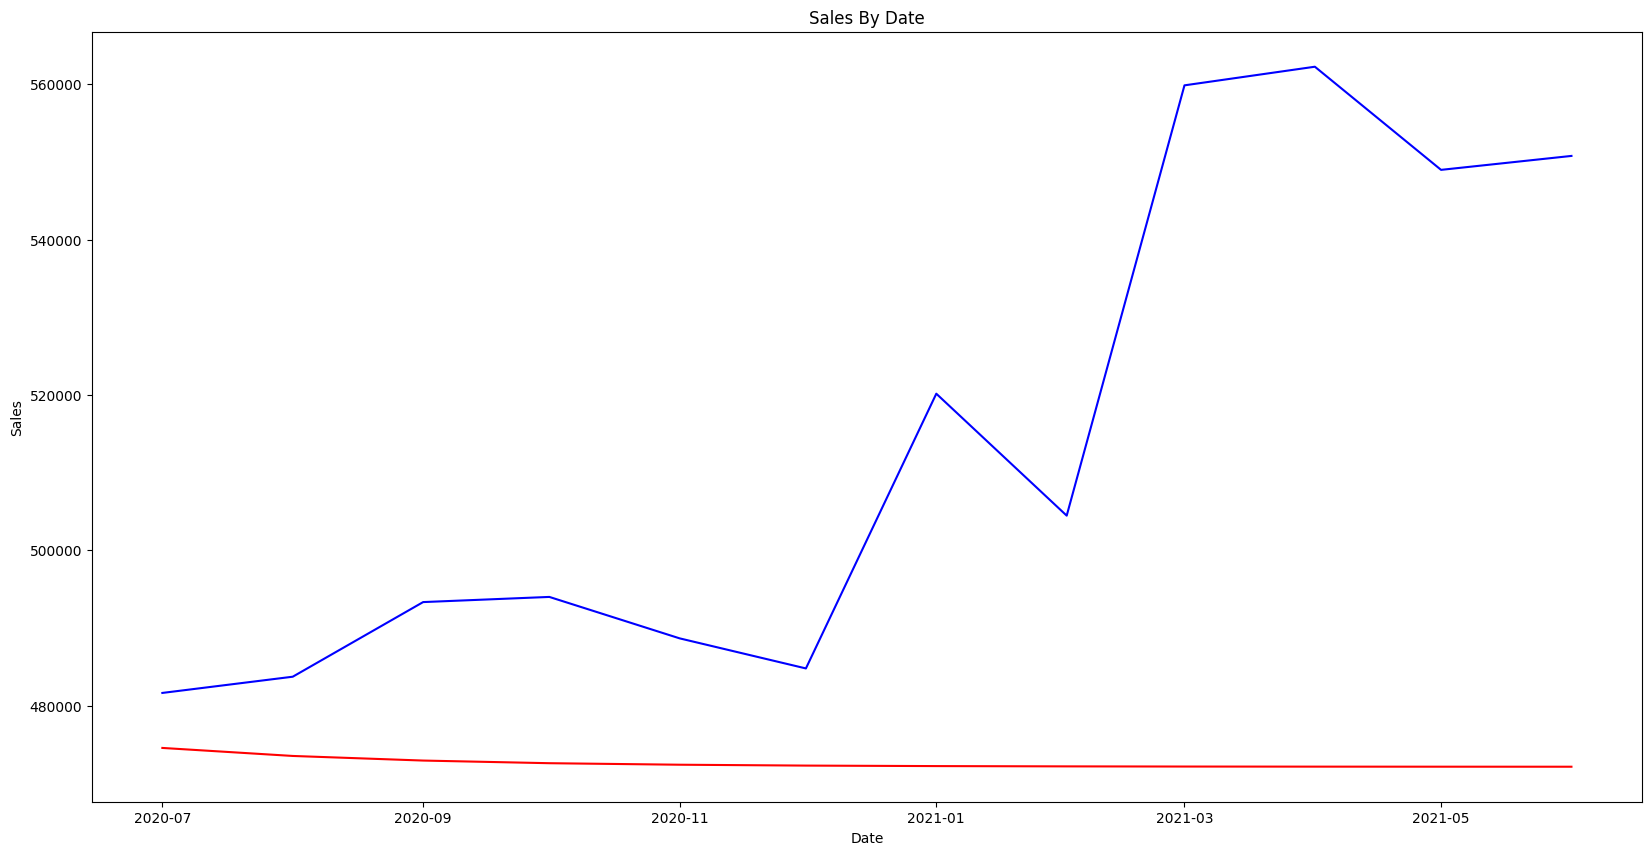

In [12]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(Y_train, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

predictions = model_fit.predict(start=len(Y_train), end=(len(Y_train) + len(y_test)) - 1, dynamic=False)

test_df['estimate'] = predictions

rmse = sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %.3f' % rmse)

## Show sales over time
plt.plot(test_df['datetime'], test_df['#Sales'], label='Actual', c='blue')
plt.plot(test_df['datetime'], test_df['estimate'], label='Estimate', c='red')
plt.title('Sales By Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Additional Exploration

 we can see that there is a Trend compoenent in th series. Hence, we now check for stationarity of the data

In [13]:
indexedDataset = df2.set_index(['datetime'])
indexedDataset.shape

(354, 1)

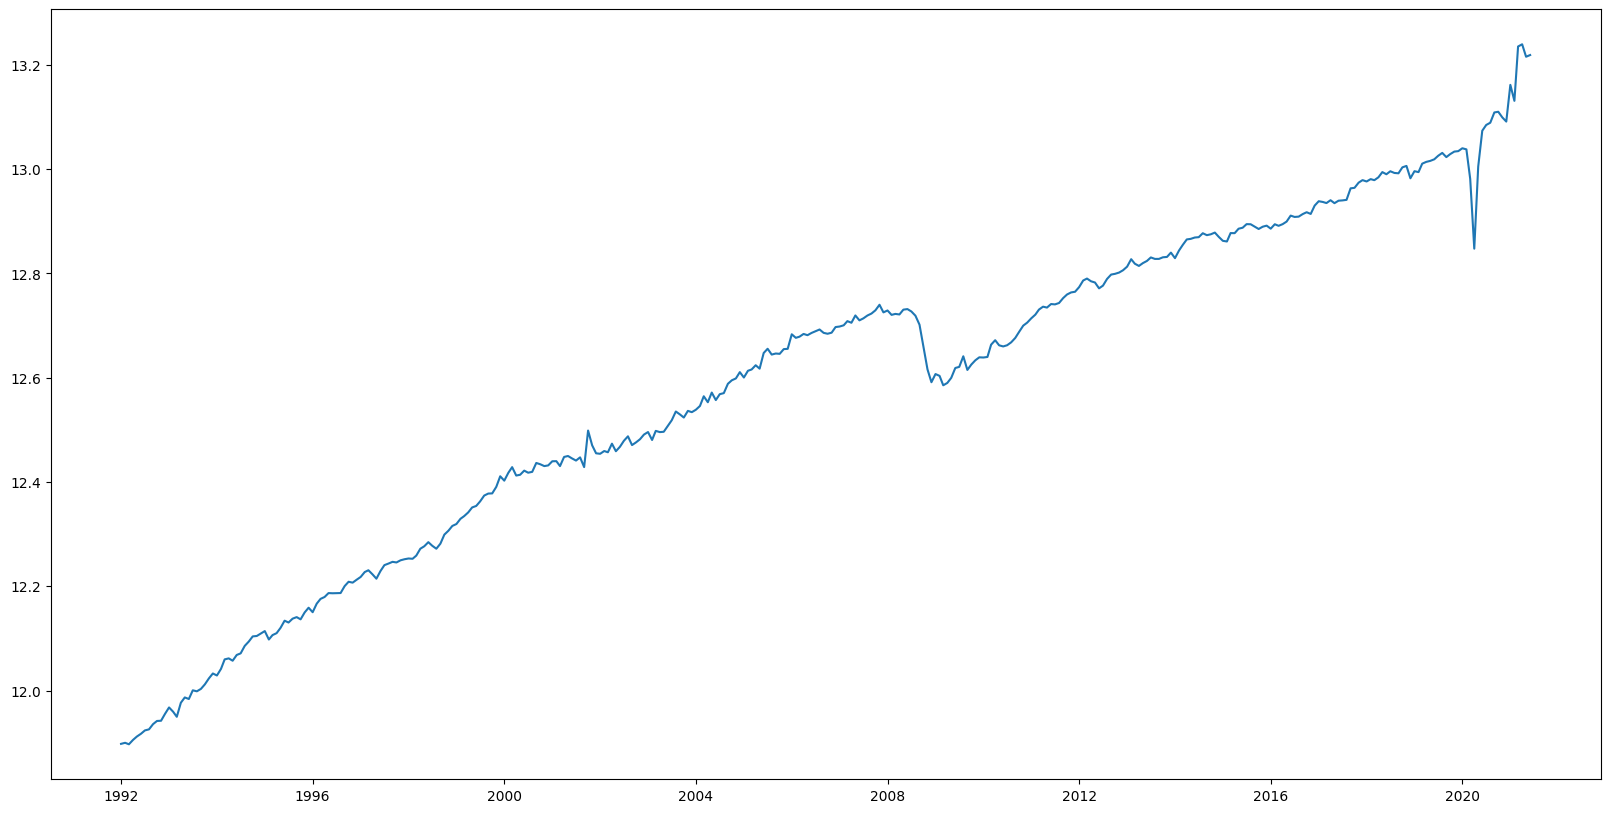

In [14]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [15]:
#Determine rolling statistics
rolmean = indexedDataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                   #Sales
datetime                 
1992-01-01            NaN
1992-02-01            NaN
1992-03-01            NaN
1992-04-01            NaN
1992-05-01            NaN
...                   ...
2021-02-01  473821.833333
2021-03-01  484287.666667
2021-04-01  499485.750000
2021-05-01  508182.083333
2021-06-01  514385.333333

[354 rows x 1 columns]                   #Sales
datetime                
1992-01-01           NaN
1992-02-01           NaN
1992-03-01           NaN
1992-04-01           NaN
1992-05-01           NaN
...                  ...
2021-02-01  37679.098312
2021-03-01  42792.773945
2021-04-01  33783.116825
2021-05-01  31749.165199
2021-06-01  32231.219119

[354 rows x 1 columns]


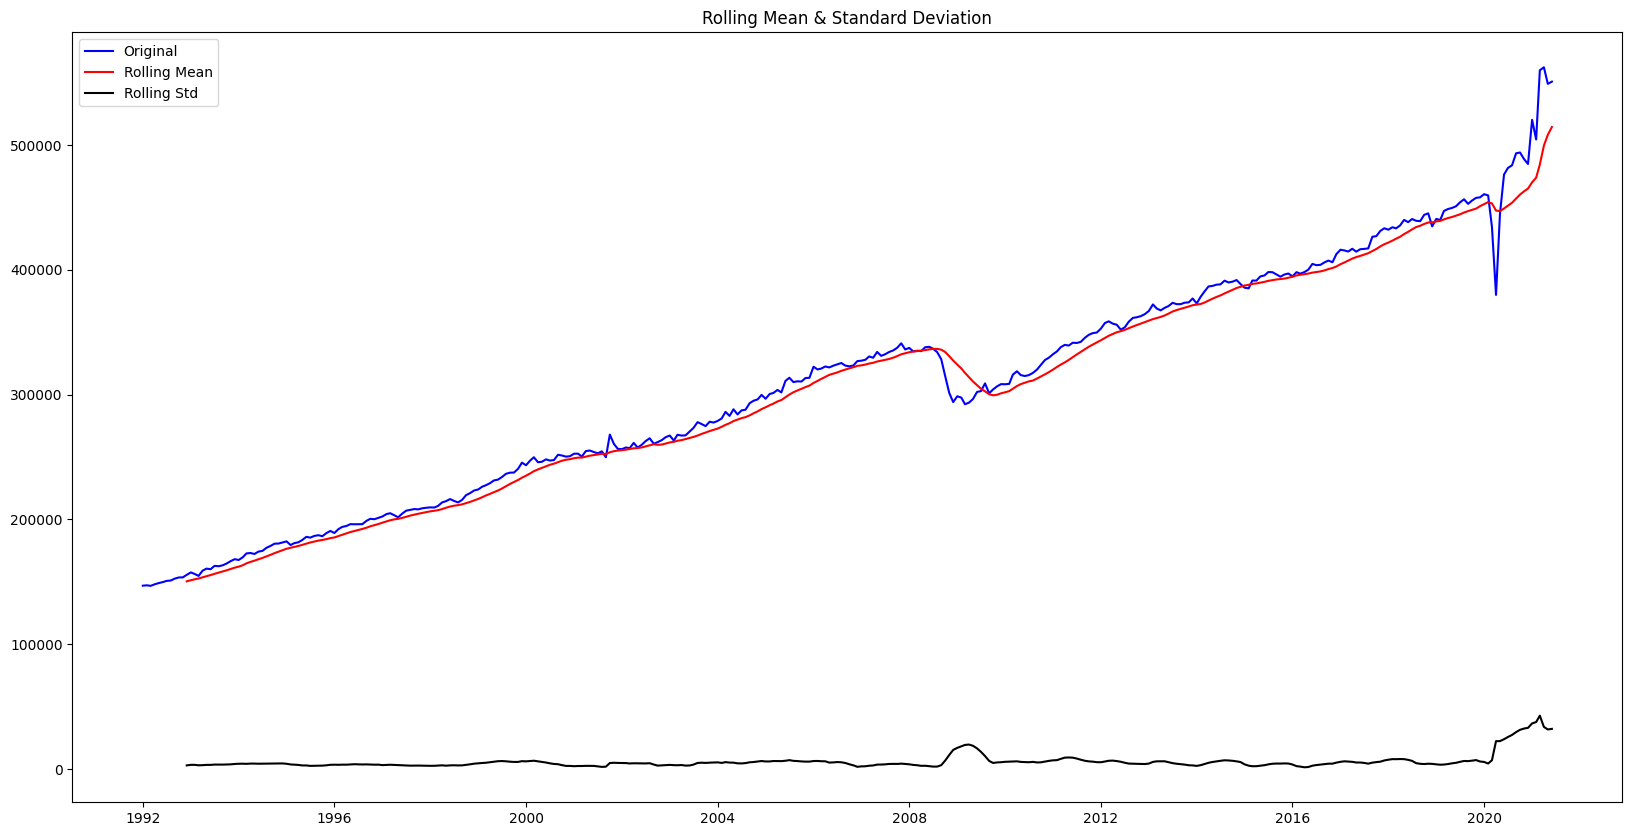

In [16]:
#Plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

To further augment our hypothesis that the time series is not stationary, let us perform the ADCF test.

In [17]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['#Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   1.449053
p-value                          0.997326
#Lags Used                      12.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


For a Time series to be stationary, its ADCF test should have:

p-value to be low (according to the null hypothesis)
The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics
From the above ADCF test result, we see that p-value(0.99) is very large. Also critical values are no where close to the Test Statistics. Hence, we can safely say that our Time Series at the moment is not stationary

### Data Transformation to achieve Stationarity ¶
There are a couple of ways to achieve stationarity through data transformation like taking  log10 , loge , square, square root, cube, cube root, exponential decay, time shift and so on ...

In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job.

#### Log Scale Transformation

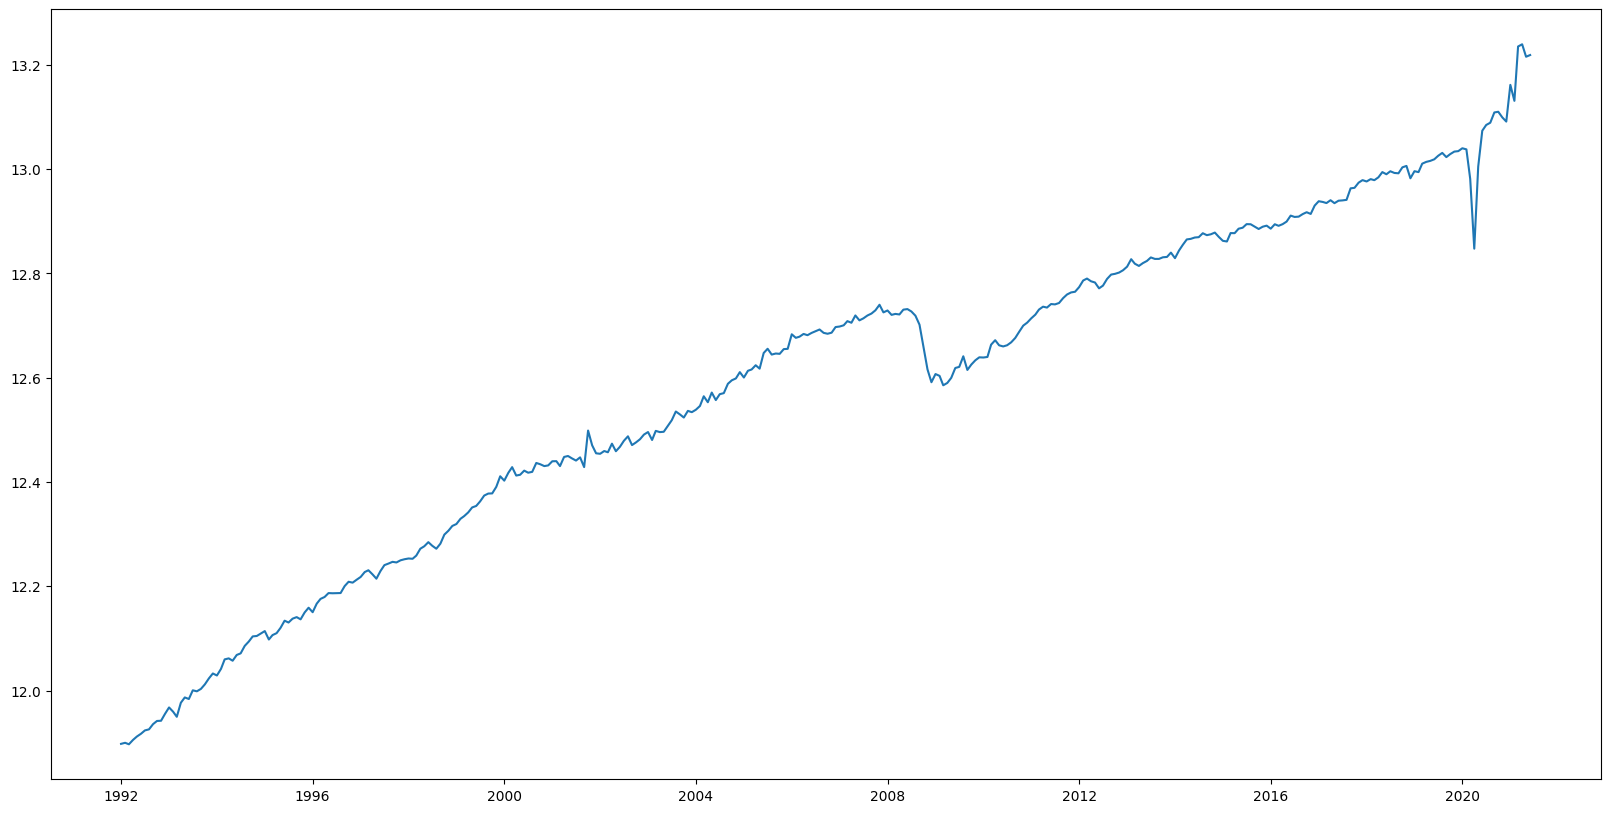

In [18]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

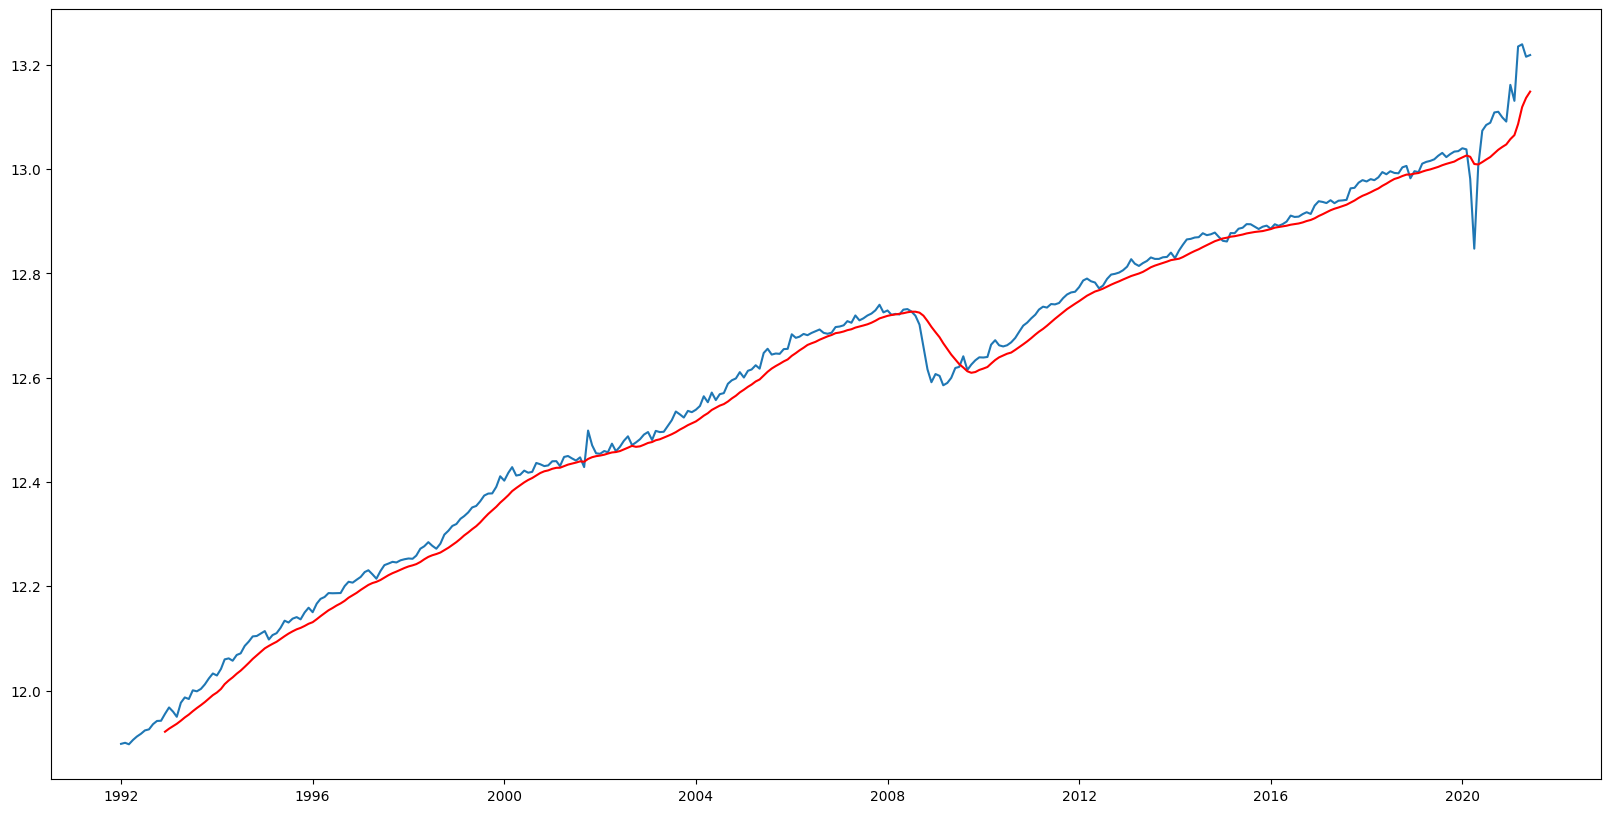

In [19]:
#The below transformation is required to make series stationary
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

From above graph, we see that even though moving avg is not stationary, it is still better than the previous case, where no transfromation were applied to series. So we can atleast say that we are heading in the right direction.

We know from above graph that both the Time series with log scale as well as its moving average have a trend component. Thus we can apply a elementary intuition: subtraction one from the other should remove the trend component of both.

In [20]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Sales
datetime,
1992-12-01,0.034184
1993-01-01,0.040759
1993-02-01,0.027576
1993-03-01,0.013447
1993-04-01,0.034450
1993-05-01,0.038382
1993-06-01,0.029845
1993-07-01,0.040088
1993-08-01,0.032100


In [21]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['#Sales'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

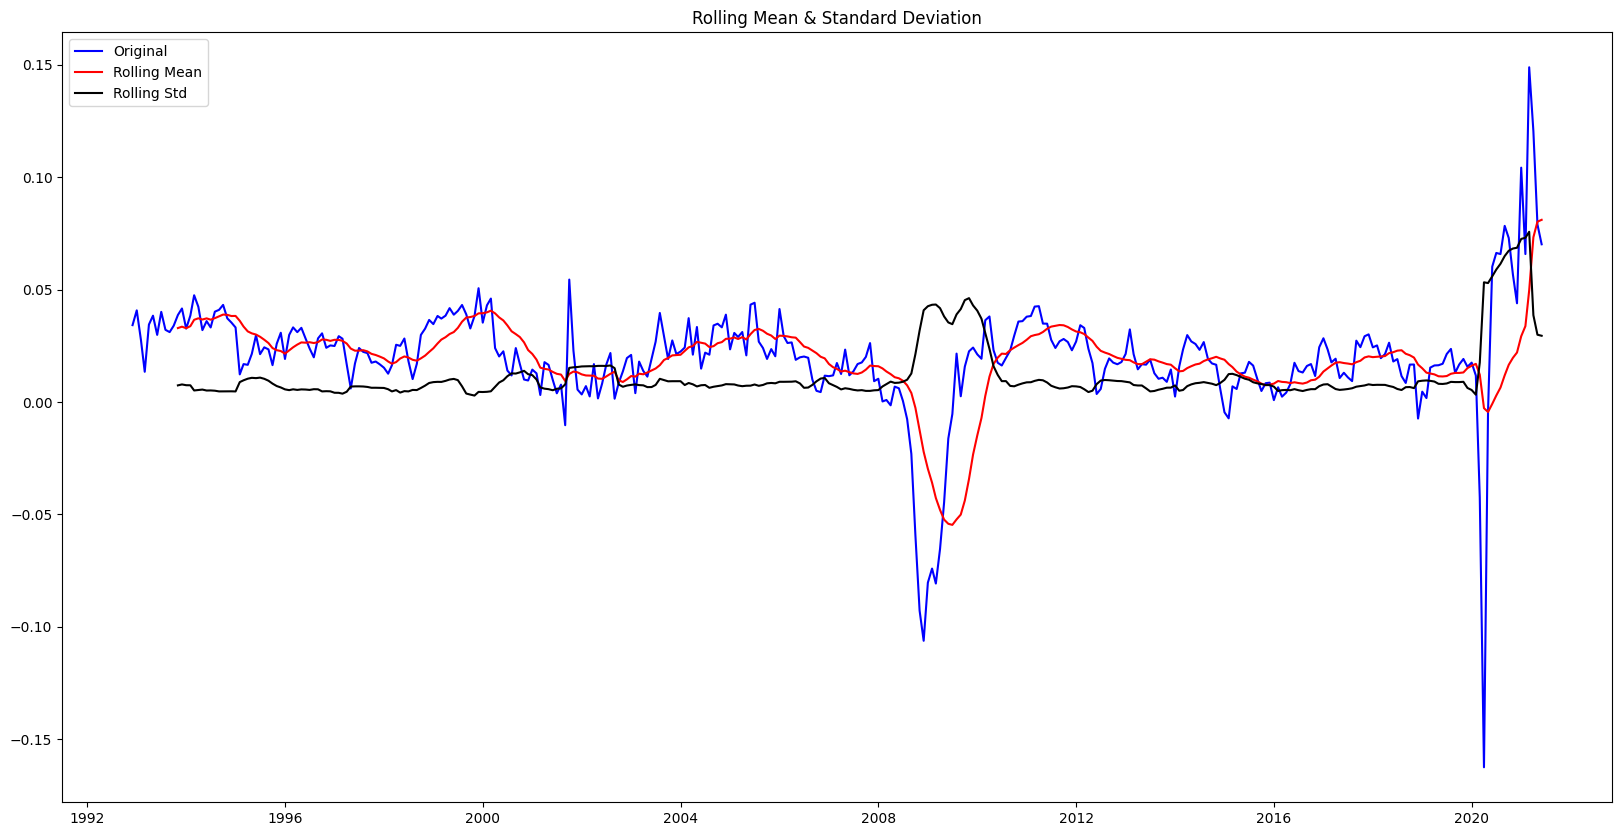

Results of Dickey Fuller Test:
Test Statistic                  -3.113073
p-value                          0.025601
#Lags Used                      12.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [22]:
test_stationarity(datasetLogScaleMinusMovingAverage)

From above graph, we observe that our intuition that "subtracting two related series having similar trend components will make the result stationary" is true. We find that:

p-value has reduced from 0.99 to 0.025.
The critical values at 1%,5%,10% confidence intervals are pretty close to the Test Statistic. Thus, from above 2 points, we can say that our given series is stationary.

#### Exponential Decay Transformation 

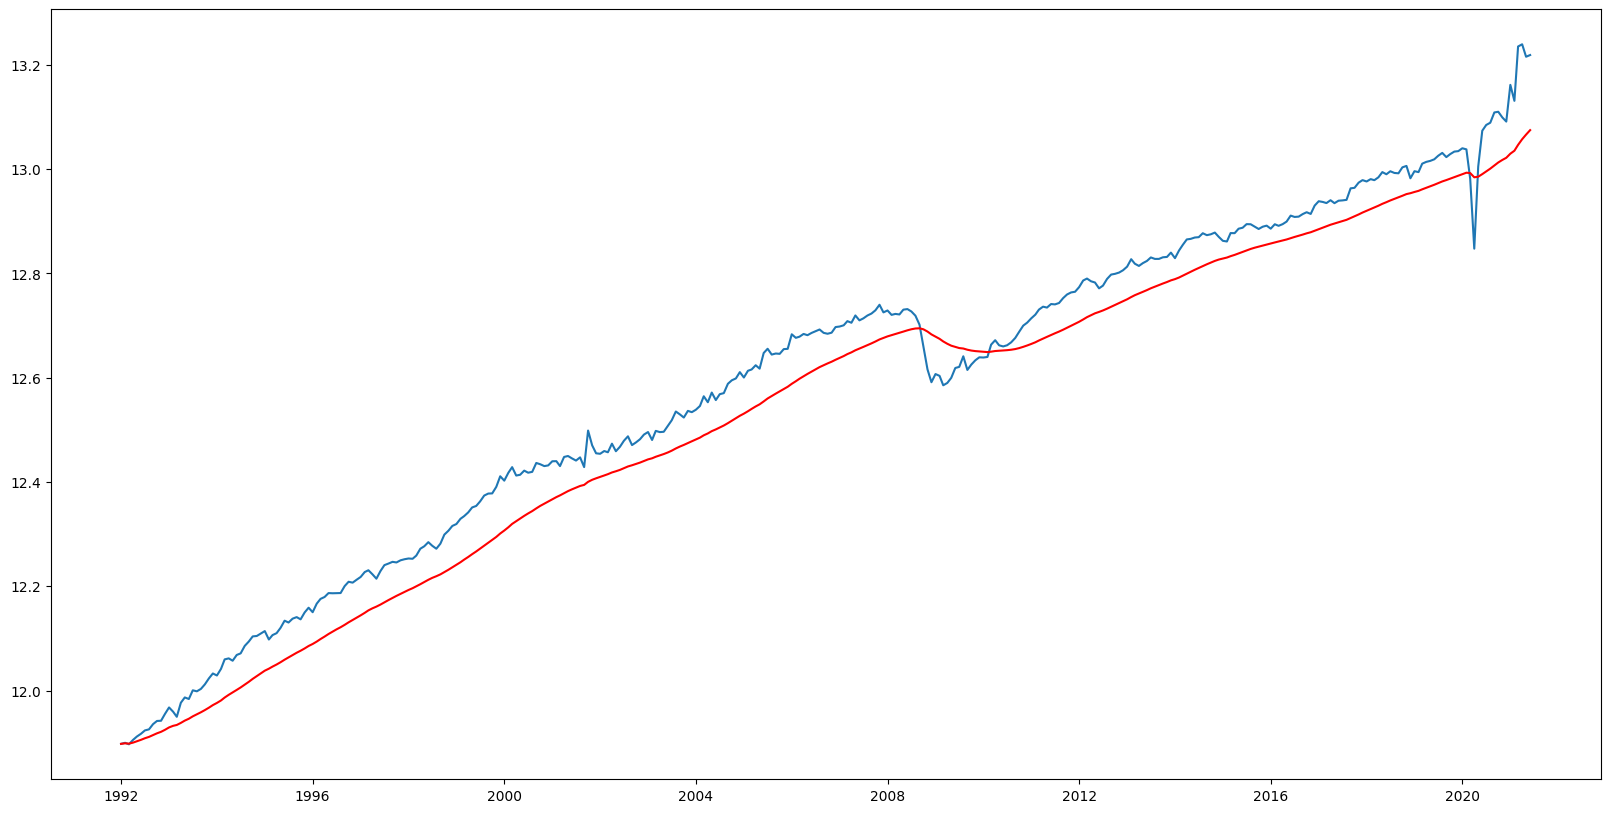

In [23]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

From above graph, it seems that exponential decay is not holding any advantage over log scale as both the corresponding curves are similar. But, in statistics, inferences cannot be drawn simply by looking at the curves. Hence, we perform the ADCF test again on the decay series below.

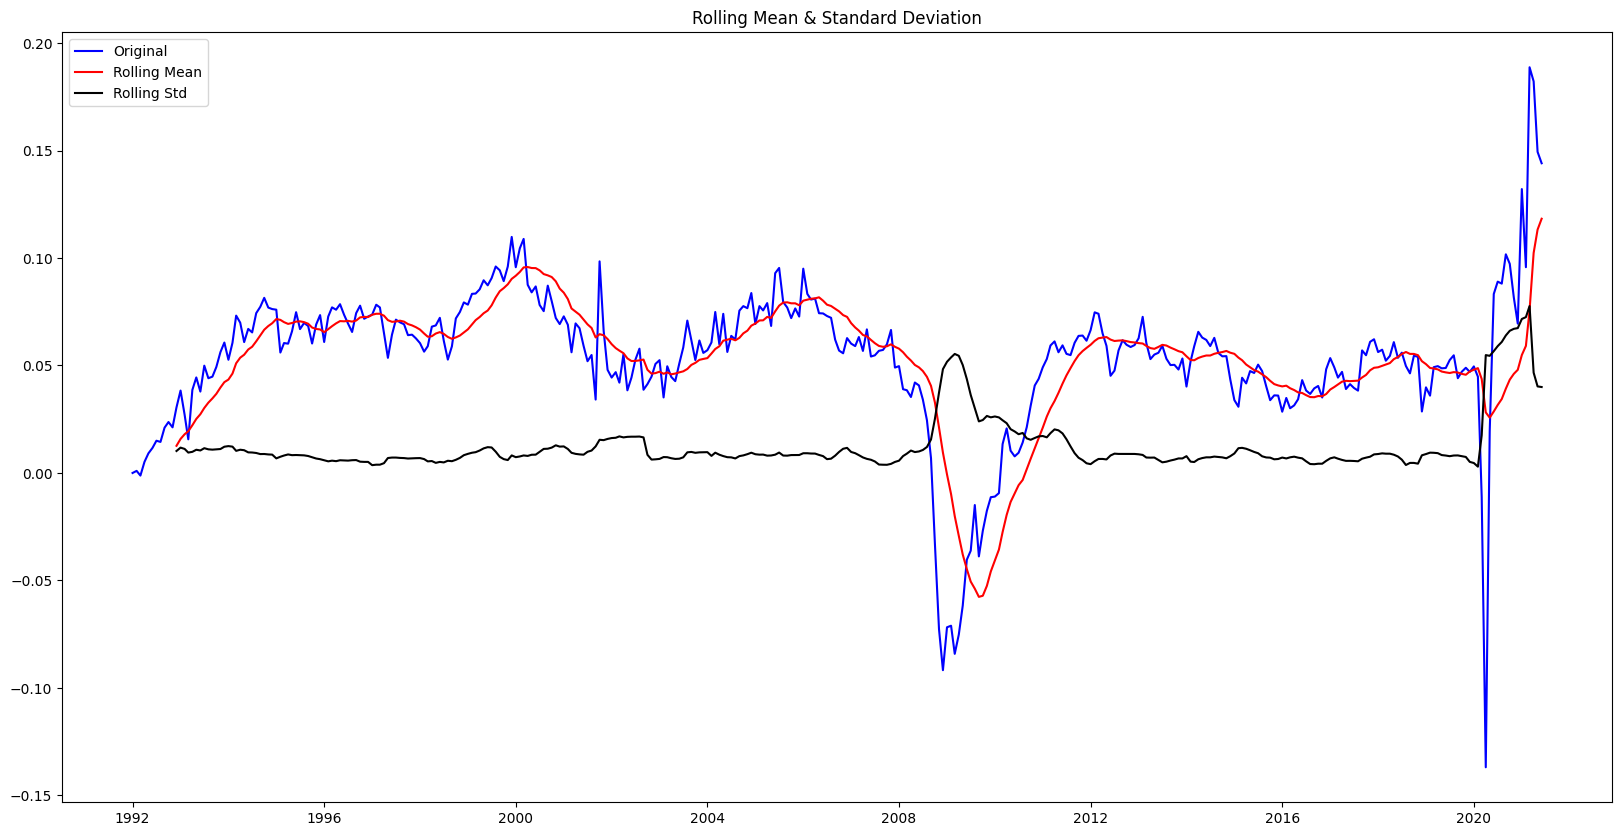

Results of Dickey Fuller Test:
Test Statistic                  -2.693714
p-value                          0.075132
#Lags Used                      12.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


In [24]:
datasetLogScaleMinusExponentialMovingAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

Exponential transformation did not yield any good results

#### Time Shift Transformation 

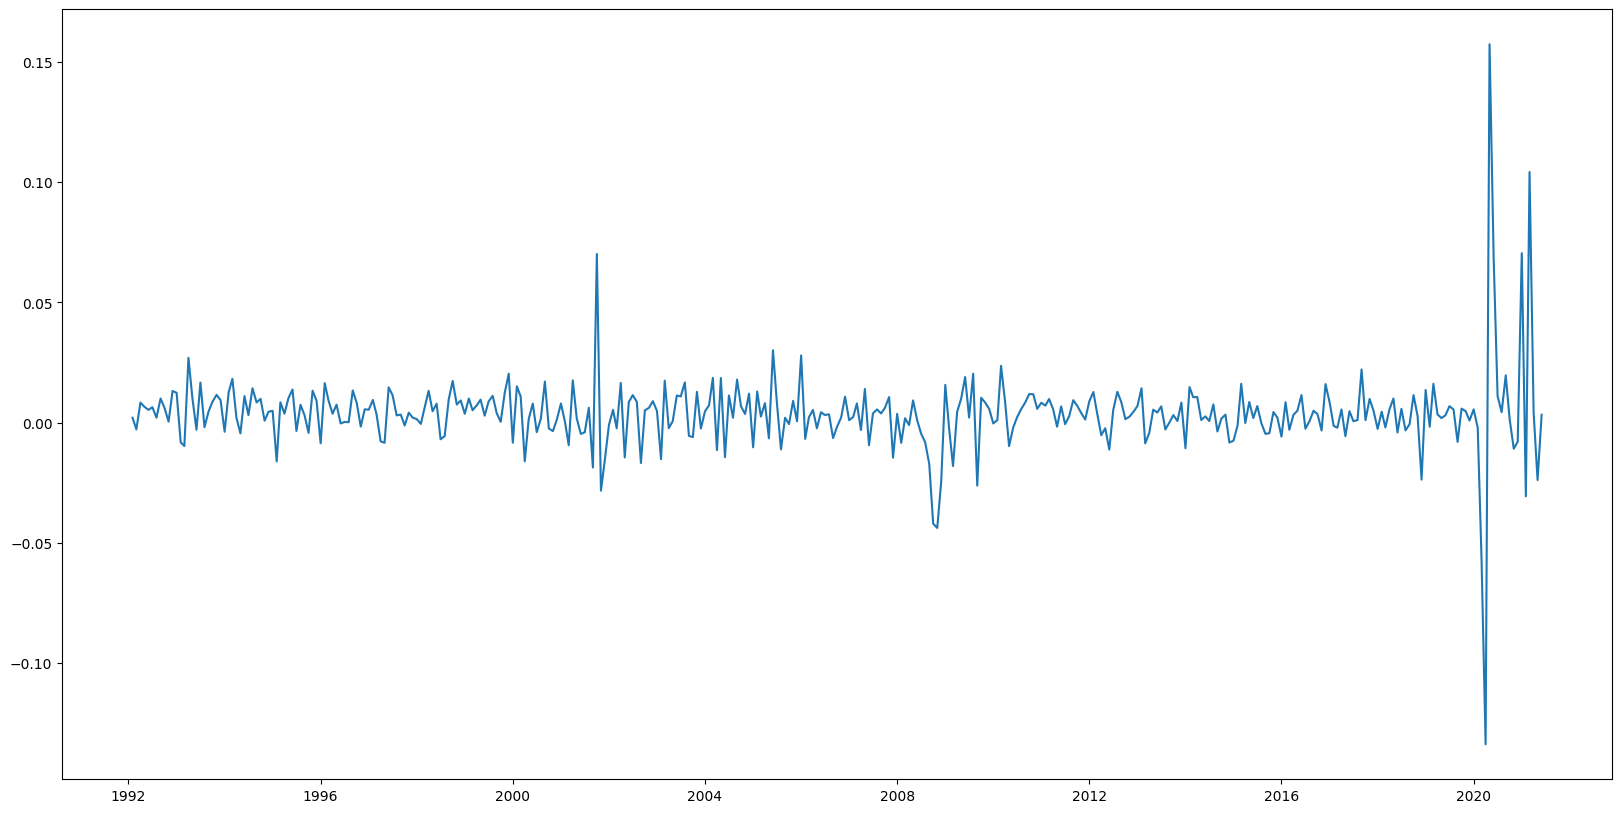

In [25]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

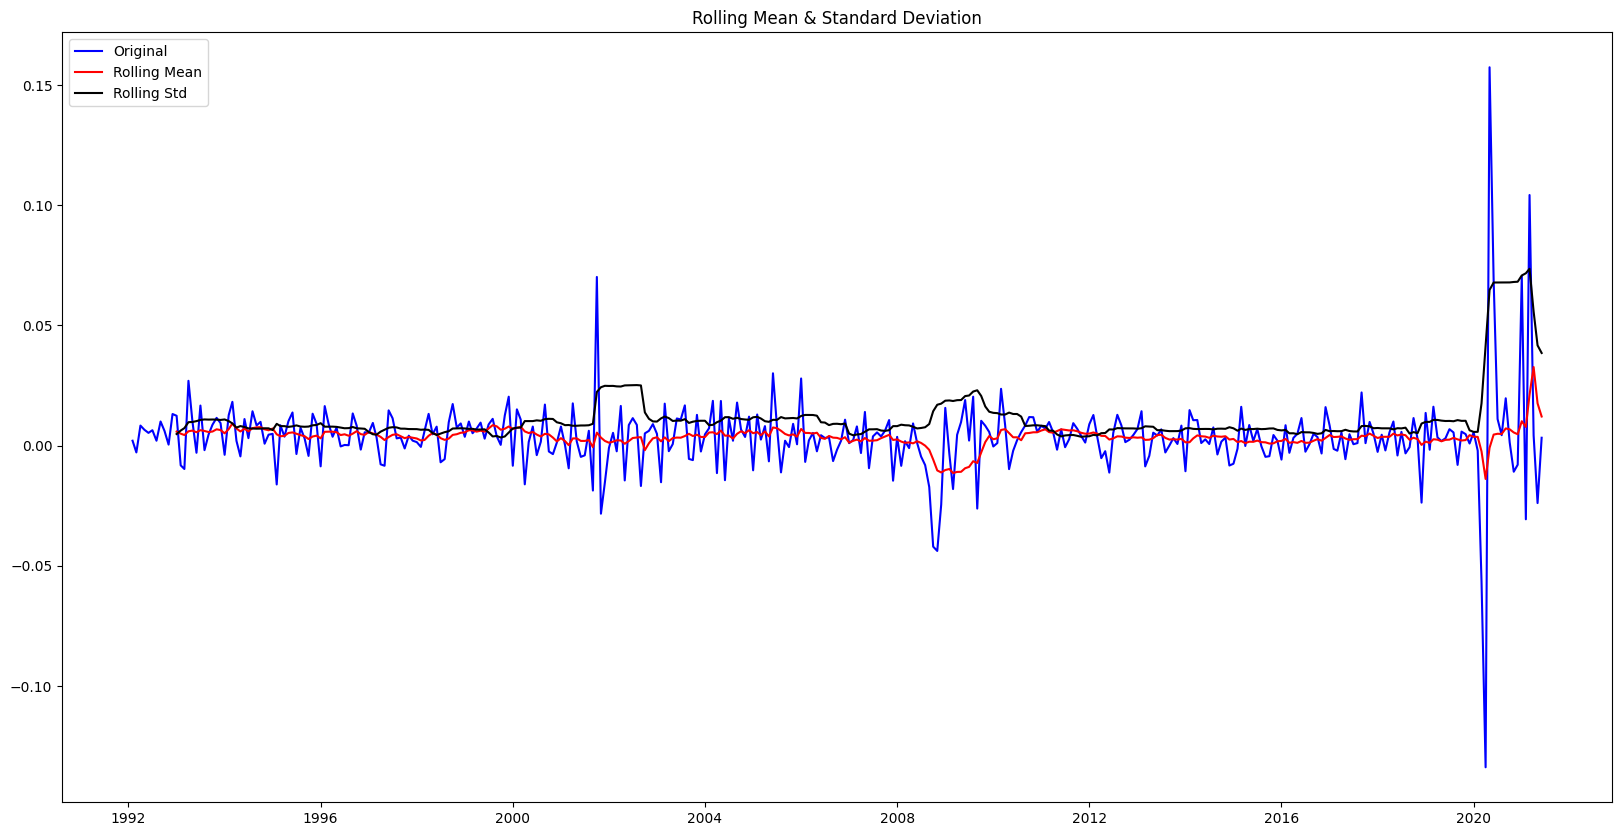

Results of Dickey Fuller Test:
Test Statistic                  -4.558484
p-value                          0.000154
#Lags Used                      11.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


In [26]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

From above 2 graphs, we can see that, visually this is the best result as our series along with rolling statistic values of moving avg & moving std. dev. is very much flat & stationary.

We have thus tried out 3 different transformation: log, exp decay & time shift. For simplicity, we will go with the log scale. The reason for doing this is that we can revert back to the original scale during forecasting.

Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

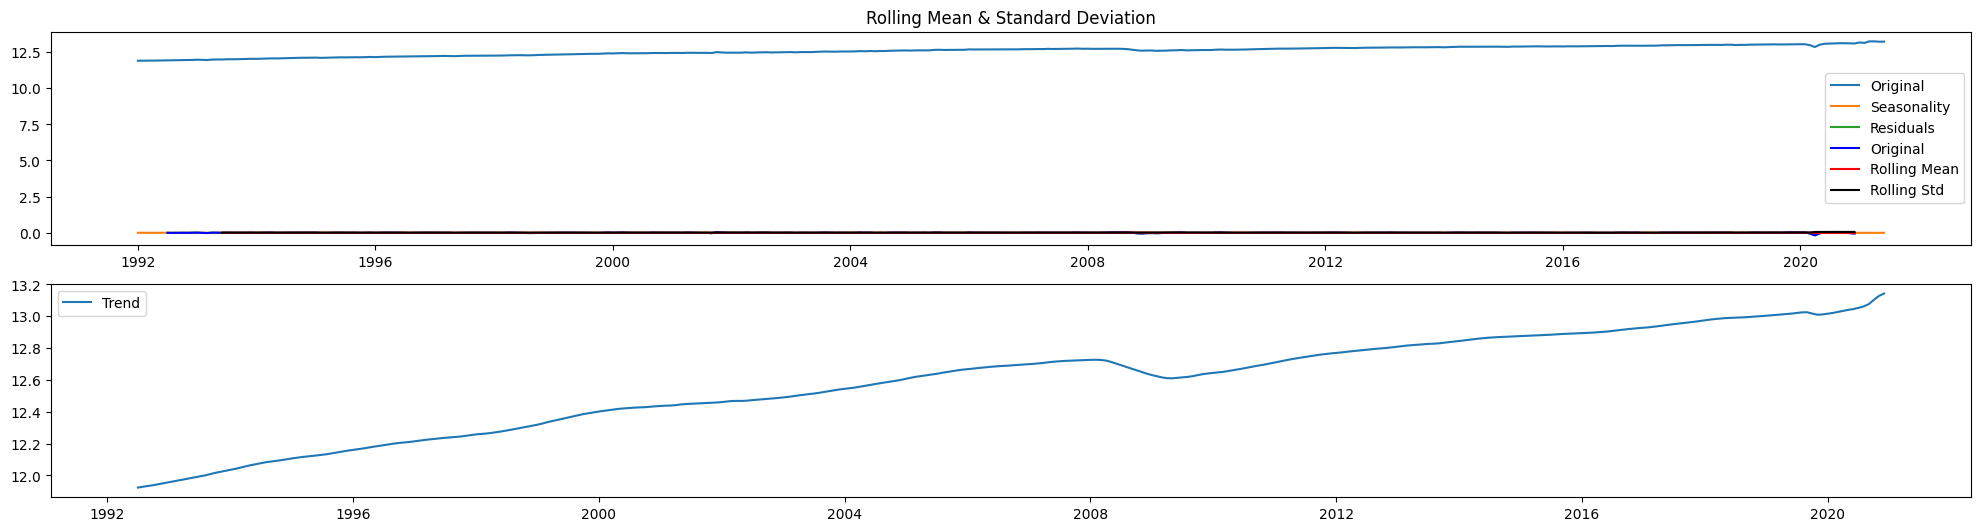

Results of Dickey Fuller Test:


KeyError: '#Sales'

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

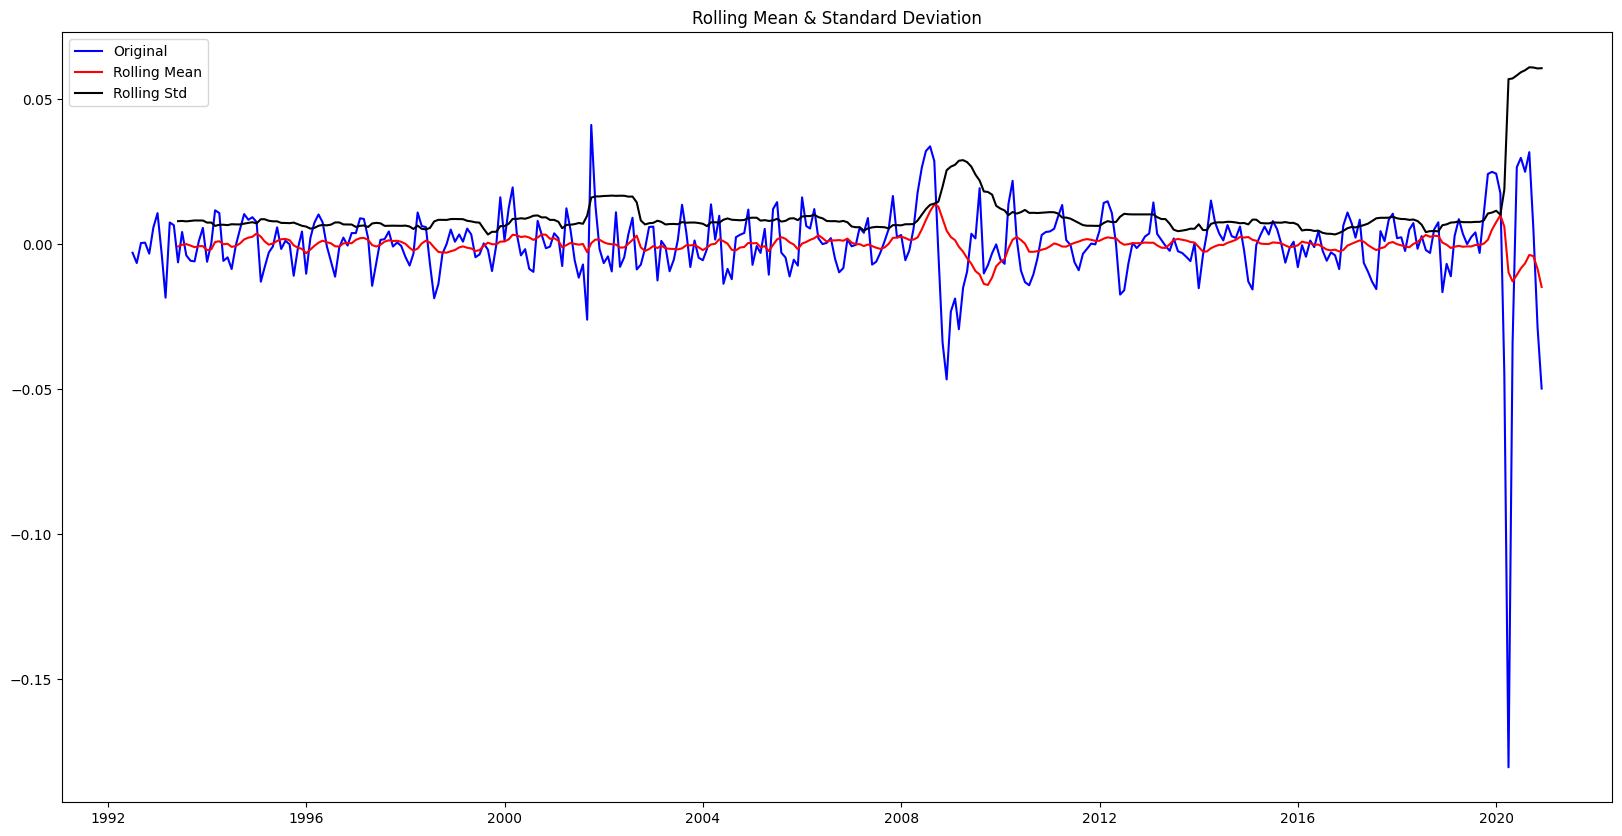

Results of Dickey Fuller Test:


KeyError: '#Sales'

In [28]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [29]:
#ACF & PACF plots

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

NameError: name 'acf' is not defined

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


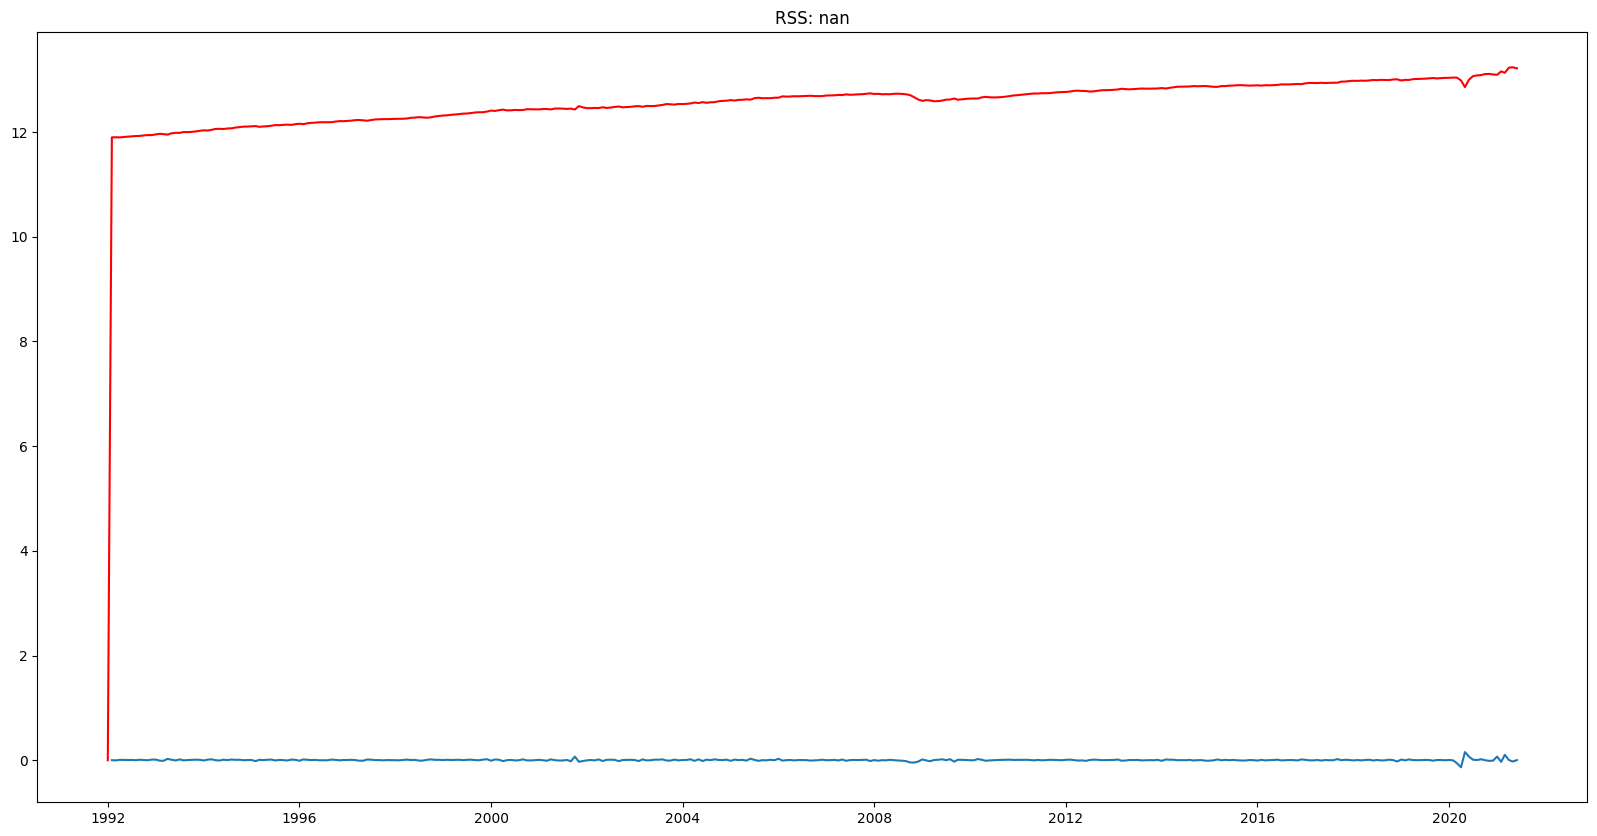

In [30]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['#Sales'])**2))
print('Plotting AR model')

C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA model


C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


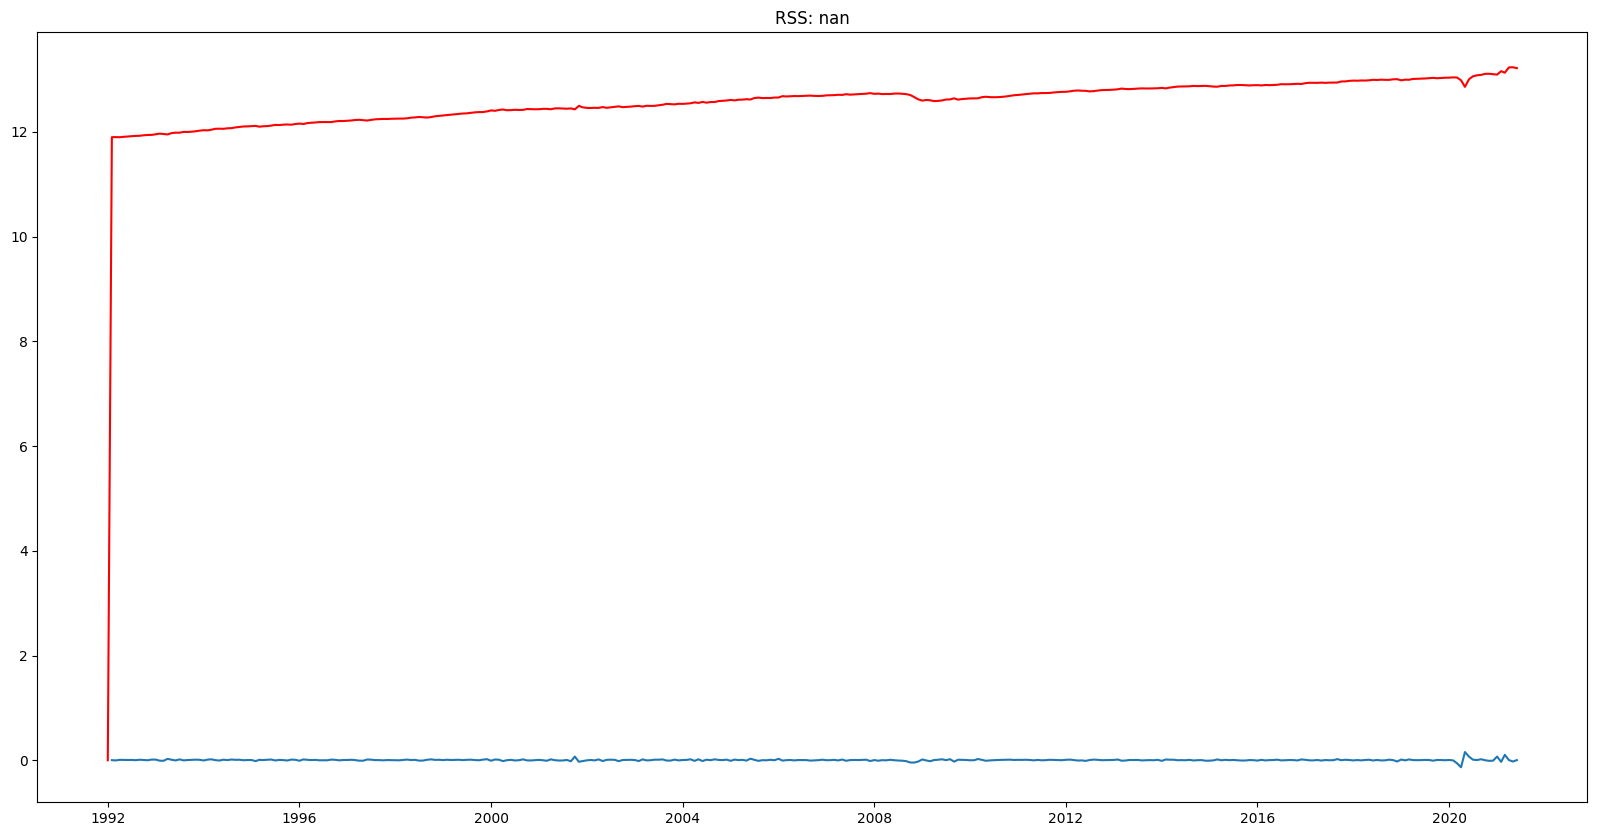

In [31]:
#MA Model
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['#Sales'])**2))
print('Plotting MA model')

C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARIMA model


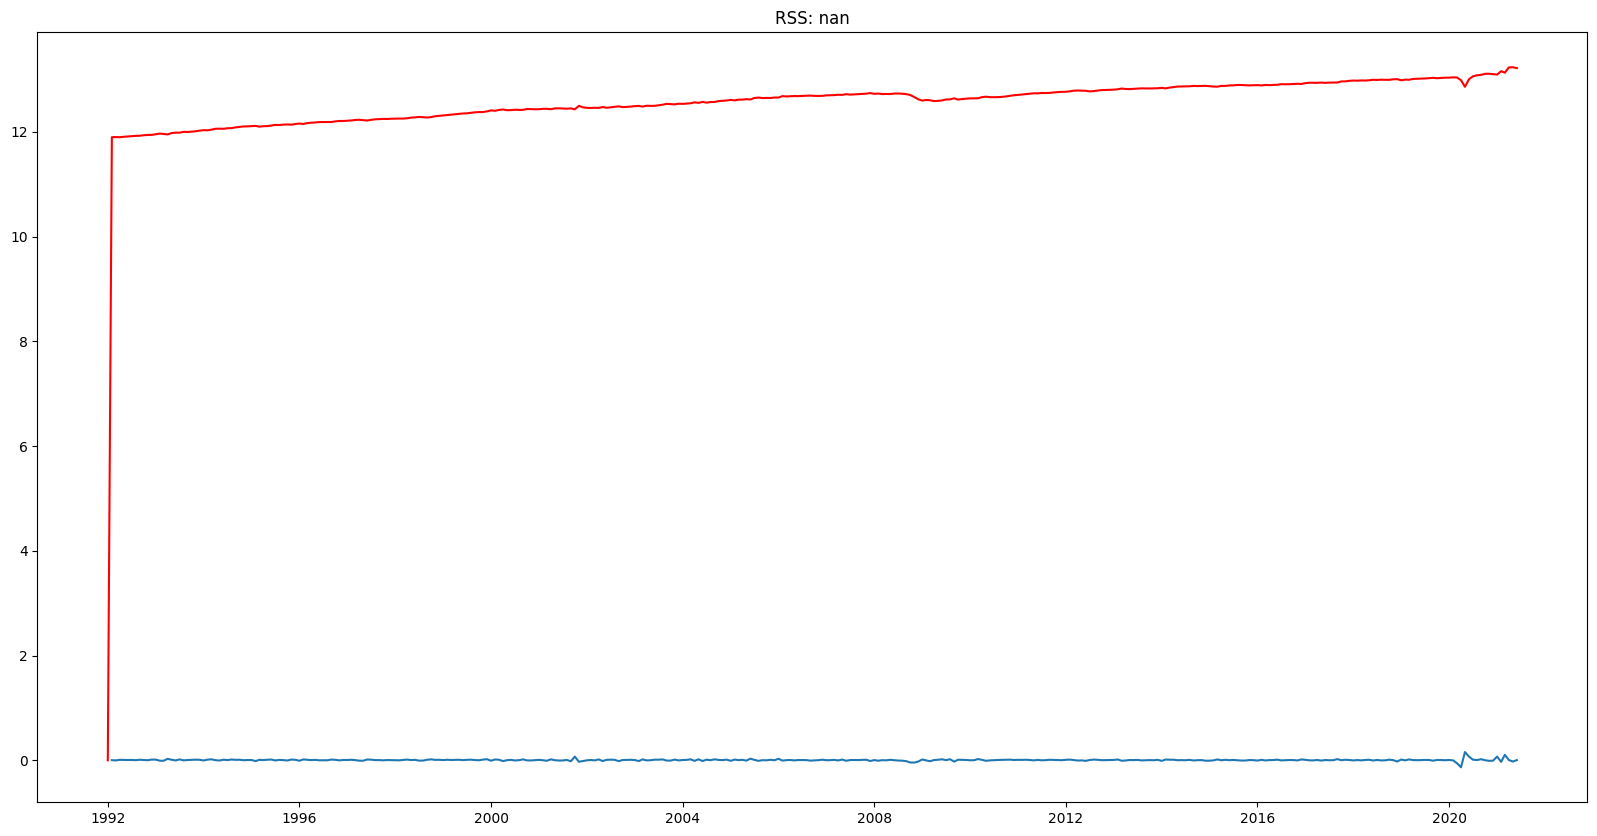

In [32]:
# AR+I+MA = ARIMA model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['#Sales'])**2))
print('Plotting ARIMA model')

In [33]:
#Prediction & Reverse transformations
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

datetime
1992-01-01     0.000000
1992-02-01    11.897678
1992-03-01    11.899588
1992-04-01    11.896895
1992-05-01    11.904862
dtype: float64


In [34]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

datetime
1992-01-01       0.000000
1992-02-01      11.897678
1992-03-01      23.797266
1992-04-01      35.694161
1992-05-01      47.599023
                 ...     
2021-02-01    4388.653622
2021-03-01    4401.781941
2021-04-01    4415.012887
2021-05-01    4428.245149
2021-06-01    4441.461823
Length: 354, dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Sales'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

datetime
1992-01-01    11.897678
1992-02-01    23.795355
1992-03-01    35.694943
1992-04-01    47.591838
1992-05-01    59.496700
dtype: float64

C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


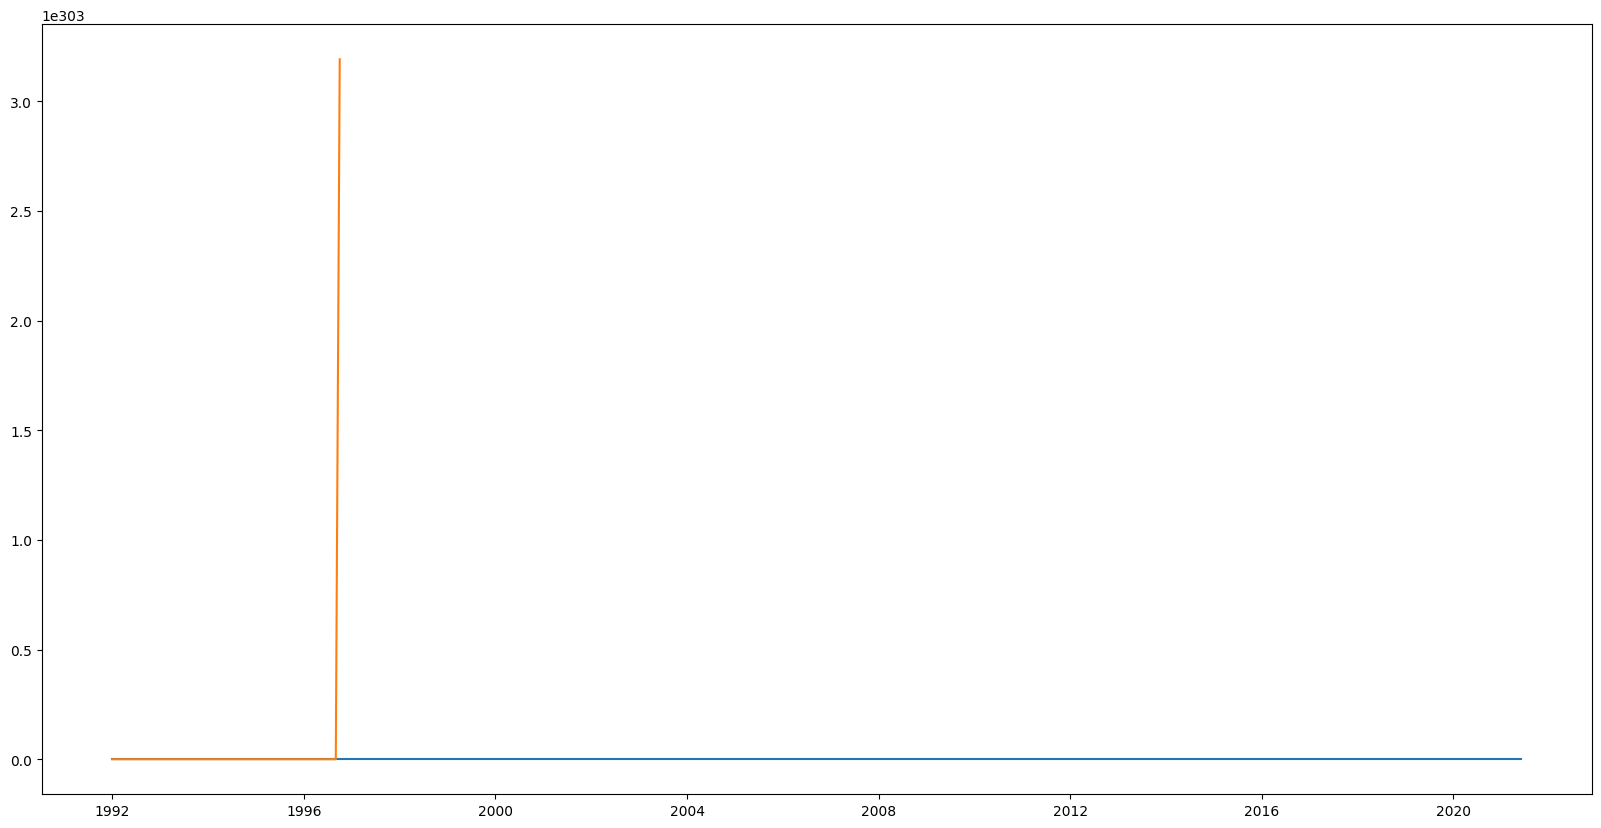

In [36]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [37]:
results_ARIMA.plot_predict(1,360) 

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'